# Oversampling to solve data imbalance

## 1. Importing Libraries

In [9]:
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

## 2. Data importing & ploting

In [2]:
df = pd.read_csv("../data/radiomics_fundus_ds.csv")
df["cl"].hist()

## 3. train, valid, test set split

In [3]:
train_df, test_df = train_test_split(df, test_size=0.3, random_state=42)
train_df, valid_df = train_test_split(train_df, test_size=0.3, random_state=42)

In [4]:
train_df.shape

(275, 59)

In [5]:
valid_df.shape

(119, 59)

In [6]:
test_df.shape

(169, 59)

## 4. Over Sampling

In [12]:
df_class_0 = train_df[train_df["cl"] == 0]
df_class_1 = train_df[train_df["cl"] == 1]

print(train_df.cl.value_counts())
count_class = train_df.cl.value_counts()[1]

df_class_0_over =df_class_0.sample(count_class, replace=True)
train_df = pd.concat([df_class_0_over, df_class_1], axis = 0)

train_df["cl"].hist(figsize = (10, 5))
train_df = shuffle(train_df)
train_df.to_csv('train_df.csv', sep = ',', na_rep = '', index = False)

1    174
0    174
Name: cl, dtype: int64


1    66
0    66
Name: cl, dtype: int64


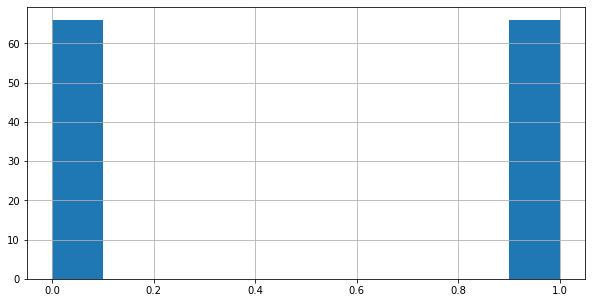

In [13]:
df_class_0 = valid_df[valid_df["cl"] == 0]
df_class_1 = valid_df[valid_df["cl"] == 1]

print(valid_df.cl.value_counts())
count_class = valid_df.cl.value_counts()[1]

df_class_0_over =df_class_0.sample(count_class, replace=True)
valid_df = pd.concat([df_class_0_over, df_class_1], axis = 0)

valid_df["cl"].hist(figsize = (10, 5))
valid_df = shuffle(valid_df)
valid_df.to_csv('valid_df.csv', sep = ',', na_rep = '', index = False)

In [17]:
test_df["cl"].hist(figsize = (10, 5))
test_df.to_csv('test_df.csv', sep = ',', na_rep = '', index = False)